<a href="https://colab.research.google.com/github/MMJGGR/SSA_EWS/blob/main/SSA_EWS_Actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title
**Predicting Sovereign Credit Risk and Default Outcomes**

# Phase 1: Business Understanding

## Background
Sovereign credit risk is influenced by complex interdependencies of economic, fiscal, and institutional factors. Identifying early warning signals of sovereign default or credit rating changes is crucial for investors, policymakers, and analysts. Drawing insights from the S&P Early Warning Signs (EWS) article, this project aims to enhance understanding and prediction of sovereign credit risk.

## Goals/Objectives
1. **Primary Goal**:
   - Develop a data-driven approach to predict sovereign default risk and credit rating changes using macroeconomic, fiscal, and institutional indicators.

2. **Secondary Goals**:
   - Identify key drivers and early warning signals of credit rating changes, including sovereign defaults.
   - Explore patterns in sovereign financial and non-financial health, such as fiscal deficits, external liabilities, GDP dynamics, etc.
   - Implement a dual approach to classify countries into risk categories and predict specific risk scores or metrics.
   - Incorporate time-series modeling to capture trends and temporal patterns in sovereign risk metrics.
   - Provide actionable insights into macroeconomic factors that exacerbate default risks.

## Key Questions
1. What macroeconomic, fiscal, and institutional factors are most indicative of sovereign default or credit rating changes?
2. How do these factors evolve in the years leading up to a default?
3. Can countries be accurately classified into risk clusters or categories based on their profiles?
4. How can time-series trends (e.g., lagged indicators, rolling averages) enhance prediction and classification models?
5. What are the limitations of current predictors, and how can this analysis improve upon existing methods?

## Constraints

1. **Limited Dataset Size**:
   - The dataset consists of only 508 records, which may introduce challenges in building highly generalizable machine learning models. Limited data can affect:
     - Model performance and accuracy.
     - The ability to capture complex interactions between variables.
     - Robustness when splitting data into training, validation, and testing subsets.
   - **Potential Mitigation**: Use cross-validation, simpler models, or explore external datasets to expand the sample size.

2. **Sudden Shocks**:
   - The dataset provides robust economic, fiscal, and institutional metrics but does not fully capture sudden political or geopolitical shocks, which often play a critical role in sovereign credit events.

3. **Qualitative Policy Factors**:
   - While institutional and governance indicators proxy for policy credibility, the dataset lacks direct qualitative inputs, such as policy decisions or geopolitical motivations behind defaults.

4. **Cross-Time Comparability**:
   - Some metrics reflect slow-moving trends (e.g., governance, demographic factors) rather than immediate risk factors. Care must be taken to interpret these metrics in the context of sovereign credit dynamics over time.

### Additional Considerations
The limited size of the dataset emphasizes the importance of:
- Careful feature selection to focus on the most relevant predictors.
- Incorporating time-series features (e.g., lagged variables, rolling averages) to capture trends over time.
- Exploring external datasets, if feasible, to complement the analysis and enhance generalizability.

## Time-Series Integration
To enhance the analysis, time-series modeling will be incorporated:
1. **Prediction**:
   - Forecast metrics such as `Net External Liability (NEL_Score)`, 'debt-to-GDP', or 'inflation trends' using time-series models like ARIMA or VAR.
2. **Classification**:
   - Identify temporal patterns (e.g., rolling averages, lagged changes) in sovereign risk indicators that predict default likelihood or risk categories.
3. **Hybrid Approach**:
   - Use time-series models to extract trends or residuals for incorporation into machine learning classifiers (e.g., Random Forest, XGBoost).
4. **Feature Engineering**:
   - Engineer temporal features such as lagged variables, rolling averages, and volatility metrics to capture temporal dynamics without full-fledged time-series modeling.

## Expected Deliverables
1. A predictive model for sovereign default risk and credit rating changes.
2. A classification model for risk categories based on macroeconomic and fiscal indicators.
3. Visualizations and insights on key risk indicators, trends, and temporal dynamics.
4. Recommendations for policymakers and analysts to mitigate sovereign credit risks.

## Refinement from S&P EWS
The S&P EWS report highlights:
- **High-Risk Indicators**: Rising interest costs, exchange rate depreciation, and escalating external liabilities.
- **Broader Trends**: Weakening public finances and balance-of-payments pressures preceding defaults.
- **Institutional Factors**: Policy credibility, fiscal discipline, and central bank independence as key determinants of risk.

These insights will guide feature selection and modeling to ensure alignment with real-world sovereign credit challenges.


#2. Data Understanding

## Loading our dataset

In [10]:
import pandas as pd
data = pd.read_csv('/content/full_dataset.csv')
data.head()

,Country,Year,current_account_balance_gdp,current_account_balance_usd,gov_gross_debt_gdp,gov_net_lending_borrowing_gdp,gov_primary_net_lending_borrowing_gdp,gov_revenue_gdp,gov_total_expenditure_gdp,gdp_ppp_share_world,...,NEL_Risk_Cluster,NEL_Risk_Level,Mapped Sovereign,Sovereign,Foreign LT,Local LT,Foreign Outlook,Local Outlook,Foreign ST,Local ST
0,Angola,2010,8.957,7.506,37.163,3.395,4.557,42.789,39.394,0.170,...,8.0,Low,Angola,Angola,B+,B+,Stable,Stable,B,B
1,Angola,2011,11.705,13.085,29.558,8.081,8.983,45.483,37.402,0.170,...,8.0,Low,Angola,Angola,BB-,BB-,Stable,Stable,B,B
2,Angola,2015,-8.841,-10.273,57.093,-2.917,-1.136,24.134,27.051,0.182,...,4.0,Low,Angola,Angola,B+,B+,Negative,Negative,B,B
3,Angola,2016,-3.051,-3.085,75.663,-4.520,-1.678,17.523,22.043,0.176,...,4.0,Low,Angola,Angola,B,B,Negative,Negative,B,B
4,Angola,2017,-0.519,-0.633,69.323,-6.586,-2.963,17.516,24.103,0.178,...,4.0,Low,Angola,Angola,B-,B-,Stable,Stable,B,B


Next we summarize our dataset's contents. We have '508 records', '69 columns' and several different datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 69 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           508 non-null    object 
 1   Year                                                                              508 non-null    int64  
 2   current_account_balance_gdp                                                       508 non-null    float64
 3   current_account_balance_usd                                                       508 non-null    float64
 4   gov_gross_debt_gdp                                                                508 non-null    float64
 5   gov_net_lending_borrowing_gdp                                                     508 non-null    float64
 6   go

In [5]:
print(f'Our data has {data.duplicated().sum()} duplicates')

Our data has 0 duplicates


In [11]:
columns_to_drop = ['current_account_balance_usd','Current_Account_Deficit_Flag','NEL_Score',
                   'NEL_Risk_Cluster','Mapped Sovereign','Sovereign','Low_Savings_Flag','Fiscal_Deficit_Flag']

data = data.drop(columns=columns_to_drop)

In [12]:
print(f'Our data now has {data.shape[0]} rows and {data.shape[1]} columns')

Our data now has 508 rows and 61 columns


## Column Descriptions and Data Types

## Dataset Overview
The dataset contains information relevant to sovereign credit risk, covering economic, demographic, governance, and environmental indicators. Below is a description of each column, grouped by subcategory, including its data type and interpretation.

### General Information
- **`Country`** *(object)*: Name of the country.
- **`Year`** *(int64)*: Year of observation.
- **Credit Ratings**:
  - **`Foreign LT`**, **`Local LT`** *(object)*: Long-term foreign and local credit ratings.
  - **`Foreign ST`**, **`Local ST`** *(object)*: Short-term foreign and local credit ratings.
  - **`Foreign Outlook`**, **`Local Outlook`** *(object)*: Credit rating outlooks (positive, negative, stable).

### Economic Indicators
- **`current_account_balance_gdp`** *(float64)*: Current account balance as a percentage of GDP.
- **`gov_gross_debt_gdp`** *(float64)*: Government gross debt as a percentage of GDP.
- **`gov_net_lending_borrowing_gdp`** *(float64)*: Net lending or borrowing by the government as a percentage of GDP.
- **`gov_primary_net_lending_borrowing_gdp`** *(float64)*: Primary net lending/borrowing by the government as a percentage of GDP.
- **`gov_revenue_gdp`** *(float64)*: Government revenue as a percentage of GDP.
- **`gov_total_expenditure_gdp`** *(float64)*: Government total expenditure as a percentage of GDP.
- **`gdp_ppp_share_world`** *(float64)*: Country’s GDP (PPP) share in the world economy.
- **`gdp_constant_prices_pct_change`** *(float64)*: Percentage change in GDP at constant prices.
- **`gdp_deflator`** *(float64)*: Implicit price deflator for GDP.
- **`gross_national_savings_gdp`** *(float64)*: Gross national savings as a percentage of GDP.
- **`inflation_avg_cpi`**, **`inflation_end_cpi`** *(float64)*: Average and end-of-period consumer price index (CPI) inflation.
- **`inflation_avg_cpi_pct_change`**, **`inflation_end_cpi_pct_change`** *(float64)*: Percentage change in CPI inflation.
- **`population_millions`** *(float64)*: Population size in millions.
- **`total_investment_gdp`** *(float64)*: Total investment as a percentage of GDP.
- **`gdp_per_capita_usd`** *(float64)*: GDP per capita in USD.

### Aggregated Subcategory Scores
These represent standardized mean scores for grouped indicators:
- **`Energy and Emissions`**: Metrics related to energy access, emissions, and carbon intensity.
- **`Natural Resources and Land Use`**: Indicators of land use, natural resource rents, and precipitation.
- **`Water and Agriculture`**: Agricultural value-added as a percentage of GDP.
- **`Health and Demographics`**: Birth rate, death rate, life expectancy, and survival rates.
- **`Employment and Labor`**: Labor force participation, employment in agriculture, and unemployment rates.
- **`Education and Connectivity`**: Access to mobile, telephone subscriptions, and urban population percentages.
- **`Government and Institutions`**: Governance percentile ranks (e.g., control of corruption, rule of law).
- **`Economic Governance`**: Credit to the private sector, FDI inflows, and merchandise trade as percentages of GDP.

### Columns Dropped
- **Flags Removed**:
  - **`Fiscal_Deficit_Flag`**, **`Low_Savings_Flag`**, **`Current_Account_Deficit_Flag`**: Simplified or redundant with other indicators.
- **Redundant Columns**:
  - **`current_account_balance_usd`**: Current account balance in USD, redundant with GDP percentage.
  - **`NEL_Score`**, **`NEL_Risk_Cluster`**: Removed to avoid prescriptive bias in modeling.
  - **`Mapped Sovereign`**, **`Sovereign`**: Redundant columns mapping credit ratings.

### Notes
- Negative indicators (e.g., emissions, unemployment) were inverted for consistency.
- Standardization was applied to numeric columns before computing subcategory scores.


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the structure, distribution, and key characteristics of the dataset. It helps identify patterns, relationships, and potential anomalies in the data. EDA also lays the foundation for subsequent steps, including feature engineering, modeling, and insights generation.

We will focus on leveraging **aggregation by economic groups, regions, and credit ratings** to make the data more interpretable and actionable. We will use various visualizations and statistical summaries to gain insights into sovereign credit risks and explore potential early warning signs of sovereign defaults.

## Objectives
1. **Understand the Data**:
   - Summarize the distributions of key indicators.
   - Identify trends, patterns, and relationships in the dataset.

2. **Leverage Aggregations**:
   - Analyze data by `economic_group`, `region`, and `credit ratings` to explore macro-level patterns.
   - Compare key indicators across these categories.

3. **Incorporate Contextual Insights**:
   - Utilize insights from the **Early Warning Signs of Sovereign Defaults (EWS)** report to highlight risk indicators (e.g., debt-to-GDP ratios, inflation, current account balances).

4. **Visualize Key Patterns**:
   - Use plots (e.g., histograms, boxplots, and time-series visualizations) to reveal hidden trends and relationships.

5. **Prepare for Modeling**:
   - Identify variables with significant importance for predicting sovereign credit risks.
   - Highlight areas requiring further feature engineering or transformation.

---

## Data Distribution by Economic Group and Region

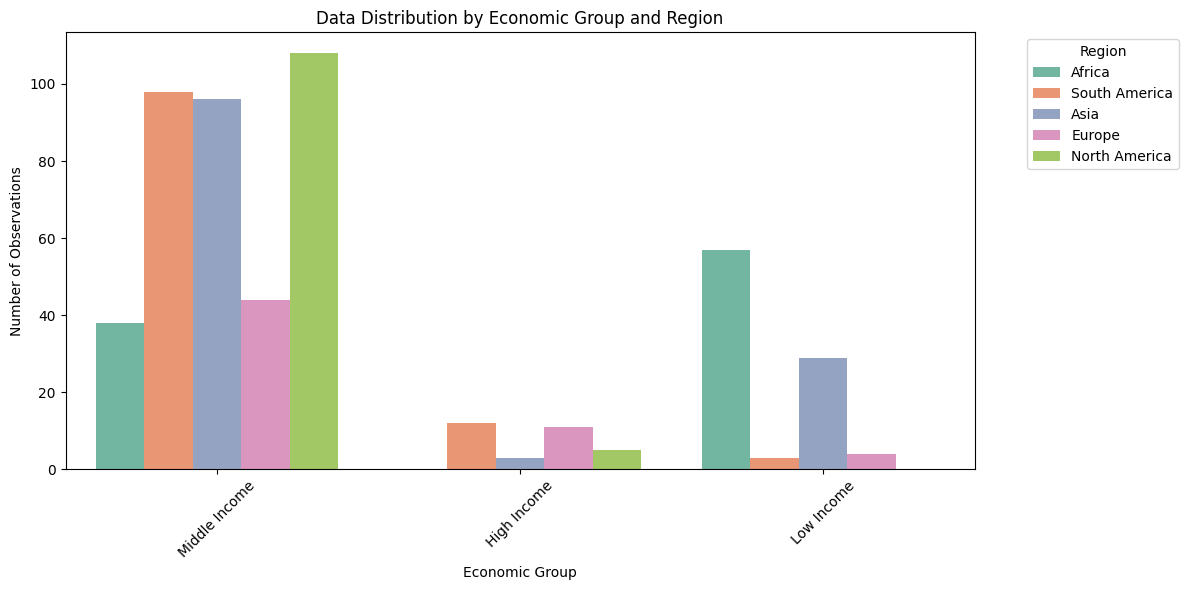

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot: Distribution by Economic Group and Region
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='economic_group',
    hue='region',
    palette="Set2"
)
plt.title("Data Distribution by Economic Group and Region")
plt.ylabel("Number of Observations")
plt.xlabel("Economic Group")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Key Insights:
1. **Economic Group Distribution**:
   - The dataset has a relatively balanced representation across `economic_group` categories: High Income, Middle Income, and Low Income.
   - Middle-income countries appear to dominate the dataset, reflecting their global prevalence.

2. **Regional Representation**:
   - Africa and Asia are heavily represented in the low-income and middle-income categories, consistent with their large populations of developing nations.
   - Europe is well-represented in the high-income category, as expected, due to its concentration of developed economies.
   - North America shows a strong presence in the middle and high income groups.
   - South America exhibits diversity, with representation across all three economic groups.

#### Observations:
- The dataset appears well-distributed across `economic_group` and `region`, supporting meaningful analysis across these dimensions.
- However, the dominance of middle-income groups may require stratification or normalization in some analyses to avoid bias.

#### Next Steps:
- Our understanding of data distribution will guide further analysis, ensuring balanced comparisons.
- We will proceed with analyzing key indicators (e.g., debt metrics, growth) grouped by economic group and region.


<ipython-input-32-49e193674fd5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


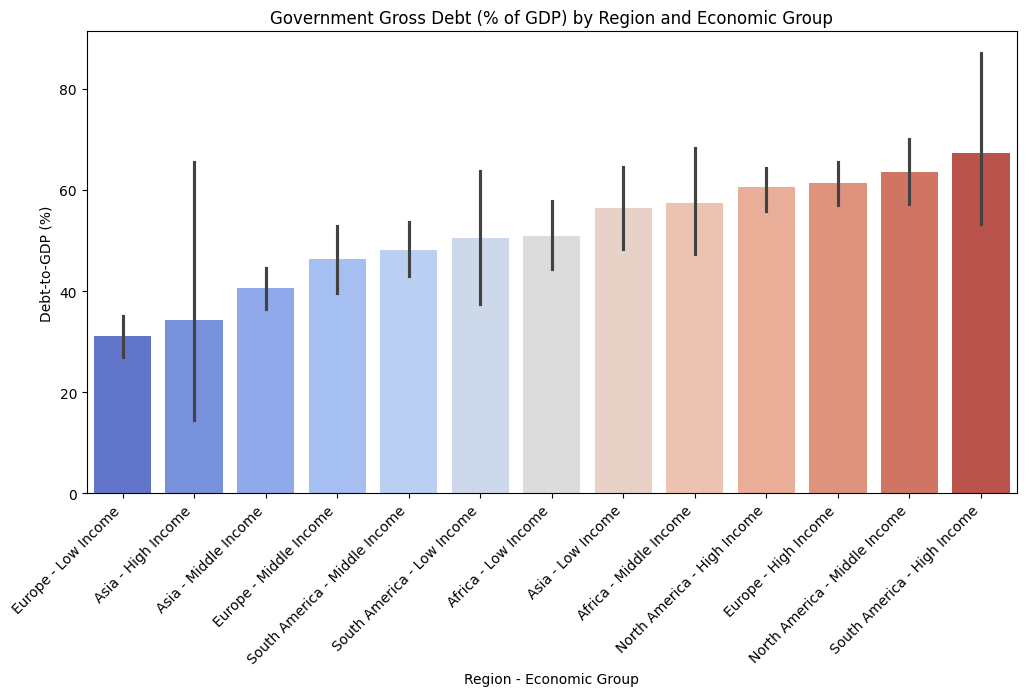

In [32]:
# Combine region and economic group into a single column for visualization
data['region_group'] = data['region'] + " - " + data['economic_group']

# Plot: Government Gross Debt (% of GDP) by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gov_gross_debt_gdp',
    palette="coolwarm",
    order=data.groupby('region_group')['gov_gross_debt_gdp'].mean().sort_values().index
)
plt.title("Government Gross Debt (% of GDP) by Region and Economic Group")
plt.ylabel("Debt-to-GDP (%)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.show()


### Government Gross Debt (% of GDP) by Region and Economic Group

#### Key Insights:
1. **High-Income Economies**:
   - High-income groups in North America and Europe exhibit the highest debt-to-GDP ratios, exceeding 60%.
   - Europe’s strong presence in the high-income group aligns with its advanced economies that have substantial borrowing capacity.
   - North America’s high-income representation reflects smaller developed economies with relatively higher fiscal space.

2. **Low-Income Economies**:
   - Africa and Asia dominate the low-income group, with debt-to-GDP ratios averaging ~40-50%.
   - These levels reflect limited fiscal capacities and access to affordable borrowing, consistent with EWS observations that lower-income countries are constrained in their ability to sustain high debt levels during economic shocks.

3. **Middle-Income Economies**:
   - South America’s middle-income economies show relatively higher debt-to-GDP ratios (~50-60%), indicating vulnerability to external shocks such as currency depreciation or rising global interest rates.
   - Middle-income regions in Asia and Africa exhibit more moderate debt levels (~40-50%), suggesting a degree of fiscal prudence or borrowing limitations.

4. **Regional Comparisons**:
   - Africa’s broad representation across low- and middle-income groups aligns with its moderate debt-to-GDP levels, highlighting heterogeneity in fiscal capacity across the continent.
   - Europe’s dominance in the high-income group contributes to its relatively higher debt ratios, reflecting developed financial markets and access to cheaper capital.

#### Context from S&P EWS:
- The **Early Warning Signs (EWS)** article highlights the importance of debt metrics as precursors to sovereign defaults.
- **Key Risks Identified**:
  - High debt-to-GDP ratios combined with weak governance and fiscal management increase the likelihood of stress events.
  - Countries in the middle-income trap (e.g., parts of South America) face elevated risks when debt surpasses sustainable levels.

#### Observations:
- The analysis confirms that high-income regions can sustain higher debt levels, while low- and middle-income regions are more constrained, consistent with the EWS findings.
- Regional and economic group comparisons highlight areas where fiscal vulnerabilities may align with governance or economic growth challenges.

#### Next Steps:
- Further analysis of **fiscal balance** (`gov_net_lending_borrowing_gdp`) and **growth** (`gdp_constant_prices_pct_change`) can provide deeper insights into debt sustainability.
- Correlate governance indicators with debt metrics to identify potential early warning signs for specific regions or groups.


<ipython-input-34-afb218cbc25a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


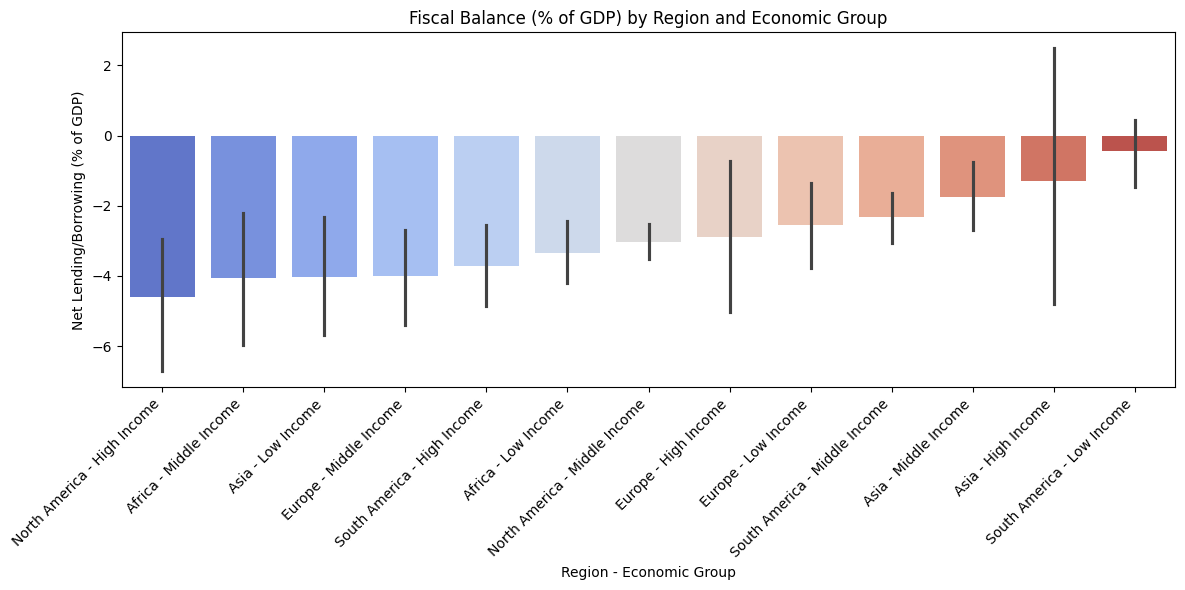

<ipython-input-34-afb218cbc25a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


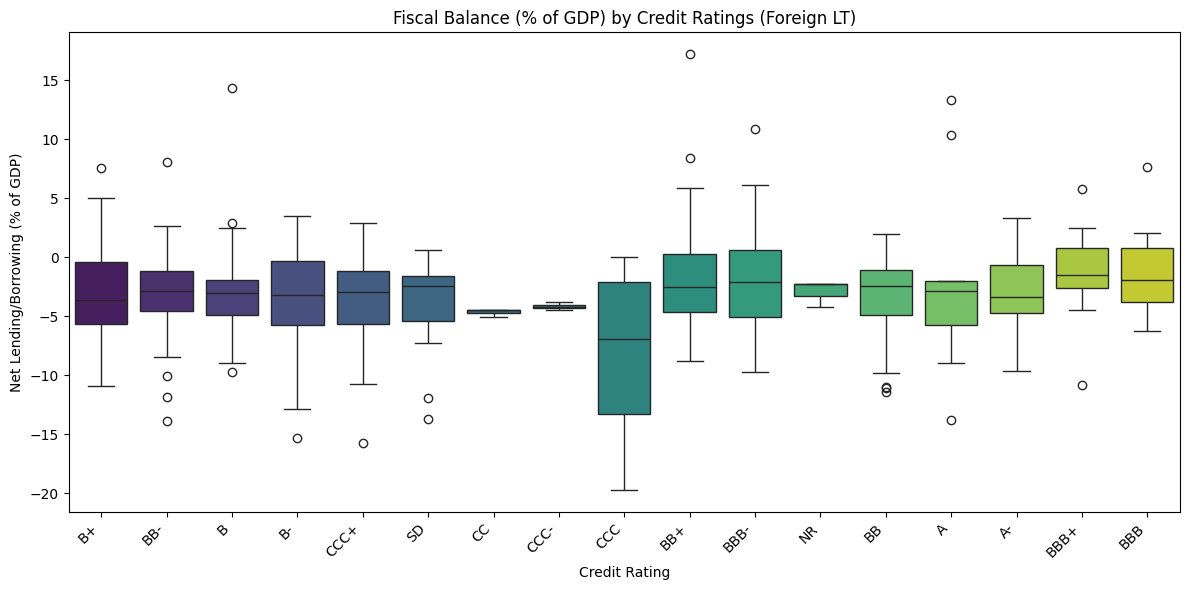

In [34]:
# Plot: Fiscal Balance by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gov_net_lending_borrowing_gdp',
    palette="coolwarm",
    order=data.groupby('region_group')['gov_net_lending_borrowing_gdp'].mean().sort_values().index
)
plt.title("Fiscal Balance (% of GDP) by Region and Economic Group")
plt.ylabel("Net Lending/Borrowing (% of GDP)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Boxplot: Fiscal Balance by Credit Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Foreign LT',
    y='gov_net_lending_borrowing_gdp',
    palette="viridis"
)
plt.title("Fiscal Balance (% of GDP) by Credit Ratings (Foreign LT)")
plt.ylabel("Net Lending/Borrowing (% of GDP)")
plt.xlabel("Credit Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Fiscal Balance (% of GDP) by Region, Economic Group, and Credit Ratings

#### Key Insights: Region and Economic Group
1. **Deficit Trends Across Groups**:
   - All region-economic group combinations show consistent fiscal deficits, with `gov_net_lending_borrowing_gdp` ranging between -2% and -6% of GDP.
   - North America (High Income) and Europe (Middle Income) exhibit the largest deficits, reflecting their reliance on fiscal stimulus and social spending programs.
   - Africa (Middle and Low Income) and Asia (Low Income) display smaller deficits, likely constrained by fiscal limitations and access to credit markets.

2. **Surpluses in Specific Groups**:
   - Asia (High Income) and South America (Low Income) demonstrate near-zero or positive fiscal balances, suggesting stronger fiscal discipline or temporary fiscal surpluses.

3. **Variability Across Groups**:
   - The variability within Africa and Asia (Low Income) is notable, with wider ranges indicating diverse fiscal situations among countries in these groups.

#### Key Insights: Credit Ratings
1. **Correlation Between Fiscal Balance and Credit Ratings**:
   - Higher-rated sovereigns (e.g., A, A-) maintain smaller deficits, often less than -2% of GDP, reflecting better fiscal discipline and access to lower-cost borrowing.
   - Lower-rated sovereigns (e.g., CCC, CC, SD) show significantly larger deficits, with medians near or below -5% of GDP, aligning with increased risk of default as identified in the EWS article.

2. **Extreme Outliers in Lower Ratings**:
   - CCC and CC ratings show large negative outliers, with some deficits exceeding -15% of GDP, highlighting fiscal distress and limited borrowing capacity.
   - Sovereigns in these categories are most at risk of default during economic shocks, as highlighted by the EWS report.

3. **Stability at Middle Ratings**:
   - Sovereigns in the BB+ to BBB- range exhibit moderate deficits (~-2% to -4%), balancing fiscal pressures with adequate credit market access.

#### Context from the EWS Article:
- The **Early Warning Signs (EWS)** article underscores the importance of fiscal deficits as a leading indicator of sovereign risk:
  - Persistent deficits weaken a country's fiscal buffers, making it vulnerable to shocks such as rising global interest rates or commodity price fluctuations.
  - Large deficits in lower-rated countries exacerbate debt sustainability risks, increasing the likelihood of default.
- The observed trends align with EWS findings, where fiscal balance deterioration is often coupled with poor governance and limited policy responses.

#### Observations and Next Steps:
1. **Observations**:
   - The relationship between fiscal balance and credit ratings reinforces the need for sound fiscal management to maintain creditworthiness.
   - Regional variations, especially in low- and middle-income groups, point to structural differences in fiscal capacity and governance.

2. **Next Steps**:
   - Analyze **economic growth** (`gdp_constant_prices_pct_change`) across groups to understand how growth interacts with fiscal balance and debt.
   - Investigate governance indicators (`Government and Institutions`, `Economic Governance`) to explore their correlation with fiscal balance and credit ratings.


<ipython-input-35-ca17f8ed9298>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


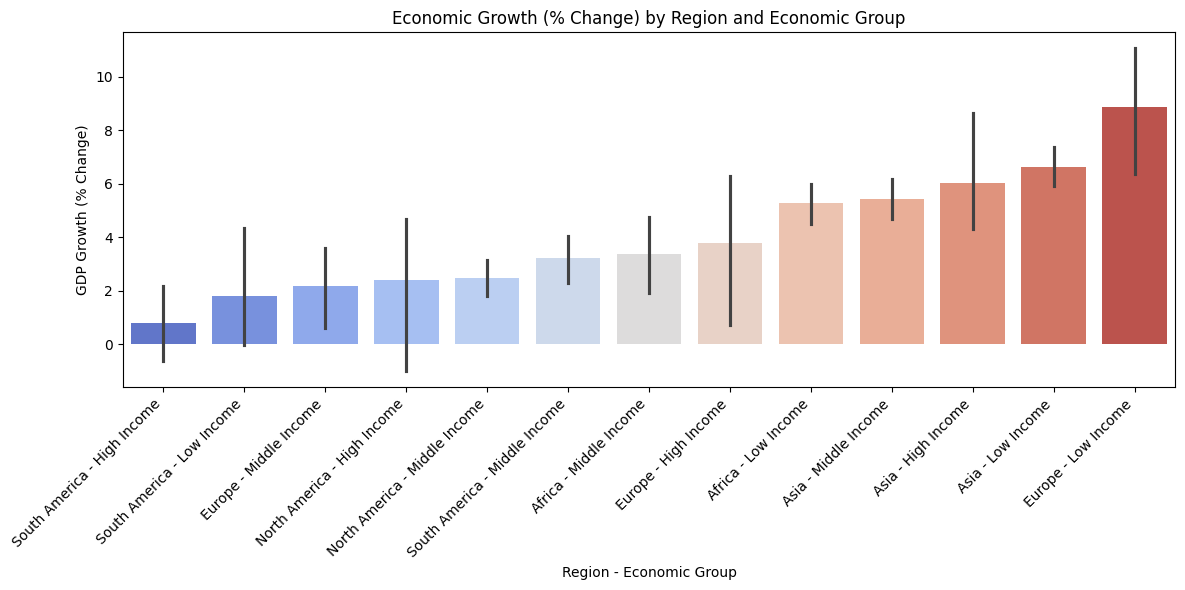

<ipython-input-35-ca17f8ed9298>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


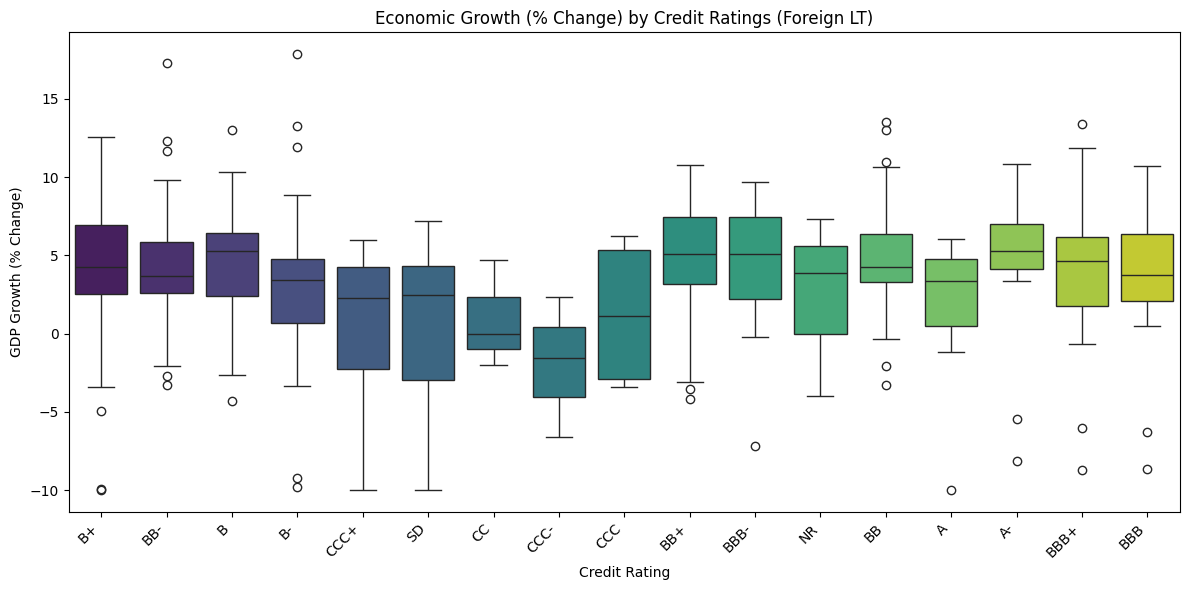

In [35]:
# Bar Plot: Economic Growth by Region and Economic Group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=data,
    x='region_group',
    y='gdp_constant_prices_pct_change',
    palette="coolwarm",
    order=data.groupby('region_group')['gdp_constant_prices_pct_change'].mean().sort_values().index
)
plt.title("Economic Growth (% Change) by Region and Economic Group")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Region - Economic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Box Plot: Economic Growth by Credit Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Foreign LT',
    y='gdp_constant_prices_pct_change',
    palette="viridis"
)
plt.title("Economic Growth (% Change) by Credit Ratings (Foreign LT)")
plt.ylabel("GDP Growth (% Change)")
plt.xlabel("Credit Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Economic Growth (% Change) by Region, Economic Group, and Credit Ratings

#### Key Insights: Region and Economic Group
1. **High Growth Regions**:
   - **Asia (High Income)** and **Europe (Low Income)** demonstrate the highest GDP growth rates, averaging above 6% annually.
   - Asia's strong growth aligns with the region's emerging market economies and rapid industrialization.

2. **Low Growth Regions**:
   - **South America (High Income)** and **South America (Low Income)** show the weakest growth, with rates hovering near or below 2%.
   - Persistent low growth in South America highlights structural challenges, including high debt burdens and political instability.

3. **Economic Group Trends**:
   - Low-income regions (e.g., Africa and Asia) exhibit higher growth rates on average compared to middle- and high-income groups.
   - High-income regions (e.g., North America and Europe) show more moderate growth, reflecting mature economies with limited room for rapid expansion.

4. **Regional Variability**:
   - Africa and Asia demonstrate significant within-group variability, indicating diverse growth trajectories among countries in these regions.

#### Key Insights: Credit Ratings
1. **Positive Correlation with Ratings**:
   - Higher-rated countries (e.g., A, BBB+) exhibit relatively stable and moderate growth (~3-6%), suggesting a balance between economic expansion and fiscal discipline.
   - Lower-rated countries (e.g., CCC, CC) show wider variability, with some economies experiencing strong growth but others stagnating or contracting.

2. **Outliers in Lower Ratings**:
   - Countries with lower credit ratings (CCC, CC, SD) show the largest variability in growth, with some experiencing contractions exceeding -5% annually.
   - These patterns align with the **S&P EWS article**, which highlights low growth as a compounding factor for sovereign risk in lower-rated countries.

3. **Stability in Middle Ratings**:
   - Sovereigns in the BB to BBB- range exhibit consistent growth (~3-5%), indicating a degree of economic stability despite fiscal challenges.

#### Context from the EWS Article:
- The **Early Warning Signs (EWS)** article identifies economic growth as a critical buffer against sovereign defaults:
  - Sustained low growth erodes a country's ability to service debt, particularly in high-debt economies.
  - Growth shocks in lower-rated countries exacerbate vulnerabilities, increasing the likelihood of fiscal and economic crises.

#### Observations and Next Steps:
1. **Observations**:
   - Economic growth strongly correlates with creditworthiness, with higher-rated countries enjoying more stable growth patterns.
   - Low-income regions and countries with lower credit ratings are more vulnerable to growth volatility, increasing sovereign risk.

2. **Next Steps**:
   - Investigate **governance indicators** (`Government and Institutions`, `Economic Governance`) to explore their influence on growth and fiscal stability.
   - Analyze **inflation** (`inflation_avg_cpi_pct_change`) to assess its impact on economic growth and credit ratings.
